In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve


In [9]:
# Load dataset
df = pd.read_csv("data.csv")  # replace with actual filename

# Show basic info
print(df.info())
print(df.head())
print(df['diagnosis'].value_counts())  # Check class distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
print(df.columns.tolist())


['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [10]:

# Convert diagnosis to binary: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for nulls
print(df.isnull().sum().sum())

# Define features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.996031746031746


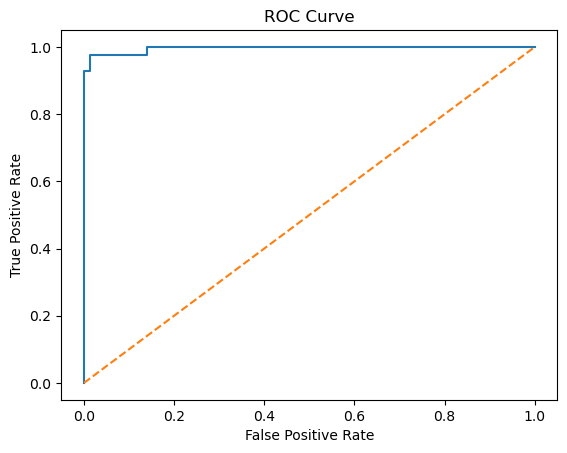

In [13]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion matrix & classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


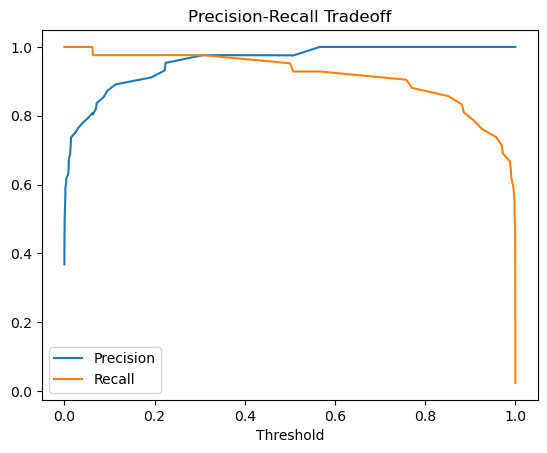

In [14]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.show()


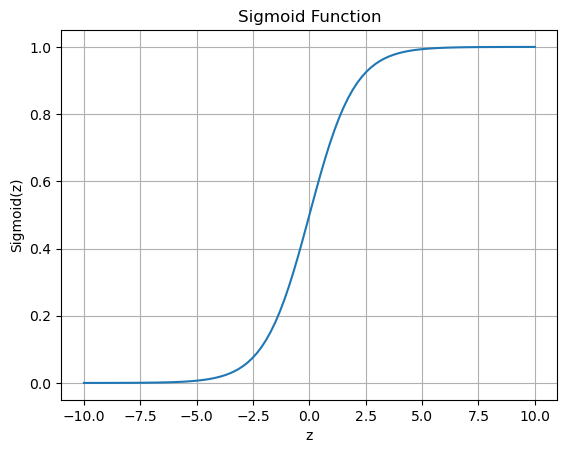

In [15]:
# Visualize sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()


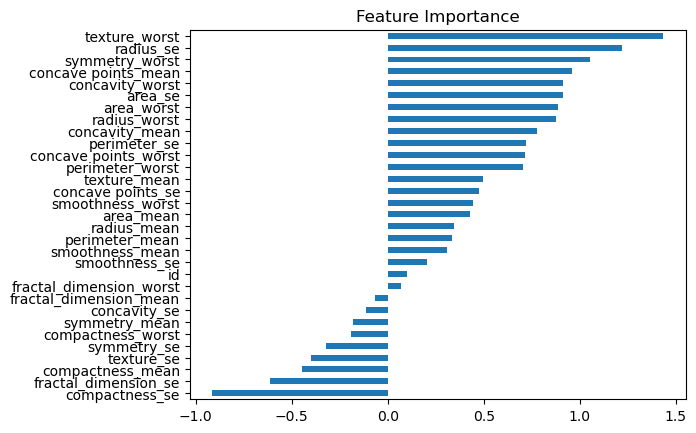

In [16]:
# Logistic Regression Coefficients
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()


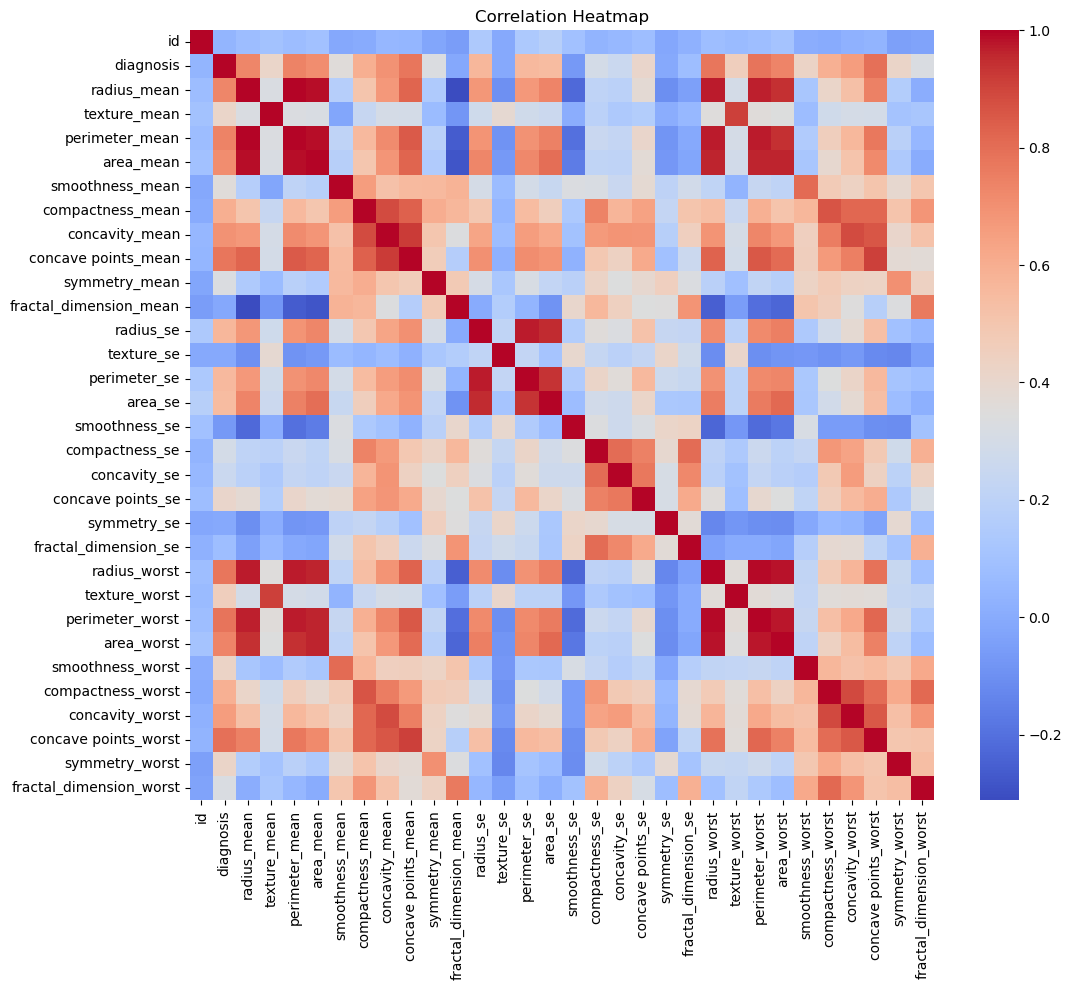

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
